In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import json
import ROOT as r
from ReadKTOutputFile import *
#from root_numpy import tree2array

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Welcome to JupyROOT 6.18/00
        _                __     
  _____(_)________ _____/ /___ _
 / ___/ / ___/ __ `/ __  / __ `/
/ /__/ / /__/ /_/ / /_/ / /_/ / 
\___/_/\___/\__,_/\__,_/\__,_/  



2020-04-30T21:56:56[INFO    ] CicadaPy(50) -> All set!


ModuleNotFoundError: No module named 'root_numpy'

In [2]:
%matplotlib notebook

In [3]:
def bayesian_efficiency(n, k):

    mean = (k+1)/(n+2)
    mode = k/n
    var = ((k+1)*(k+2))/((n+2)*(n+3))-(k+1)**2/(n+2)**2
    mode_errors = [mode - (mean-np.sqrt(var)), mean+np.sqrt(var) - mode]
    
    return mean, mode, np.sqrt(var), mode_errors


def LoadFilelist(mypath, search_str = '.'):
    '''
    Get list of all files fullfilling a few naming conditions
    '''
    filelist = []
    print('Searching files in {} with "{}" in filename'.format(mypath, search_str))
    for (dirpath, dirnames, filenames) in os.walk(mypath):
        for name in filenames:
            if '.root' in name and search_str in name:
                filelist.append(name)
    return filelist

def GetEventIdFromFilename(filename):
    splitted_name = filename.replace('.', '_')
    splitted_name = splitted_name.split('_')
    for s in splitted_name:
        #print(s)
        if s.isdigit():
            break
    return s

# get list of files

def get_path_list(paths, slopes):
    list = []
    for path in paths:
        for slope in slopes:
            list.append(path + str(slope))
    return list
def read_root(path_to_sim):
    f = r.TFile.Open(path_to_sim, 'read')
    
    tree=f.Get("Event_0")
    
    start_freq_true = tree2array(tree, branches=["StartFrequencies"])[0][0]
    
    return start_freq_true

In [4]:
with open('../20200213_sierra_jobs/true_frequencies.json') as true_freq_file:
    true_freq = np.asarray(json.load(true_freq_file))
with open('../20200213_sierra_jobs/reconstructed_frequencies.json') as rec_freq_file:
    rec_freq = np.asarray(json.load(rec_freq_file))

with open('../20200213_sierra_jobs/simulated_slope_event.json') as sim_slope_event_file:
    reconstructed_slope_arr = np.asarray(json.load(sim_slope_event_file))

with open('../20200213_sierra_jobs/simulated_start_times.json') as sim_start_times_file:
    true_track_times = json.load(sim_start_times_file)
with open('../20200213_sierra_jobs/reconstructed_start_times.json') as rec_start_times_file:
    reconstructed_track_times = json.load(rec_start_times_file)

In [5]:
delta_frequency = rec_freq.flatten() - true_freq
#print(delta_frequency)

In [6]:
print(delta_frequency)

[  -351.09353174   1873.08779703  -2799.52885707   3996.00762859
 -11439.6288329   -2751.81134311  -8919.55224372  -1781.1136785
   -221.36058268 -14491.10533361   2954.49159195 -12735.43501191
  -4075.40928926  -4250.61692278  -1492.40674739  -5129.46681007
   -269.83650687  -2313.15737895   -457.5706769  -15621.91638878
 -14497.20884924   -294.74885944  -5459.18405482  -3828.29137547]


<IPython.core.display.Javascript object>


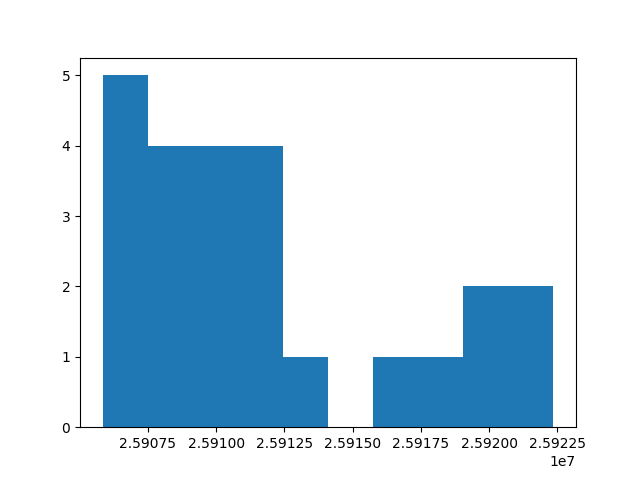

In [7]:
plt.figure()
plt.tight_layout()
plt.hist(true_freq)
plt.show()

<IPython.core.display.Javascript object>


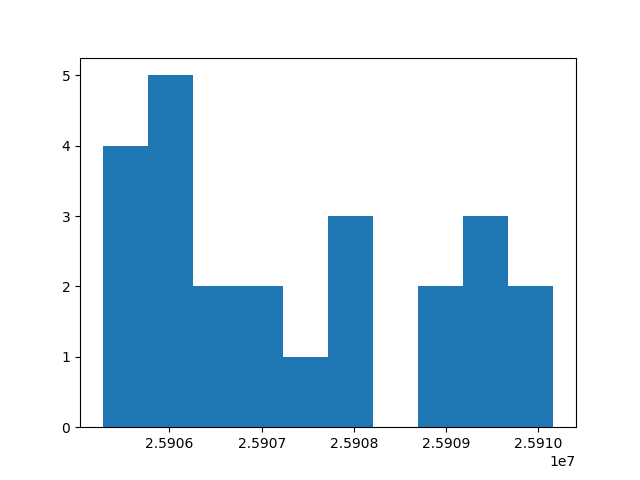

In [8]:
plt.figure()
plt.tight_layout()
plt.hist(rec_freq)
plt.show()

In [9]:
print(len(true_freq))
print(len(rec_freq))
print(len(delta_frequency))

24
24
24


In [8]:
#CHANGE THIS!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#slope_int = [0.1, 0.4, 0.7, 1.0, 1.1]
slope_int = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]#, 1.2]
slope_colors = ['b', 'm', 'g', 'r', 'c']
slope_labels = []
freq_mask = []

#creating masks of start frequencies for each slope interval
for i in range(len(slope_int) - 1):
    freq_mask.append(np.where((reconstructed_slope_arr >= slope_int[i]) 
                                    & (reconstructed_slope_arr < slope_int[i+1]))[0])
    slope_labels.append(str(slope_int[i]) + ' - ' + str(slope_int[i+1]))

print(freq_mask)

[array([ 7, 22]), array([0, 2, 6]), array([ 8, 14]), array([10, 11]), array([16, 18]), array([ 4, 12, 20]), array([23]), array([15]), array([ 1, 17, 19]), array([ 3,  5,  9, 13, 21])]


<IPython.core.display.Javascript object>


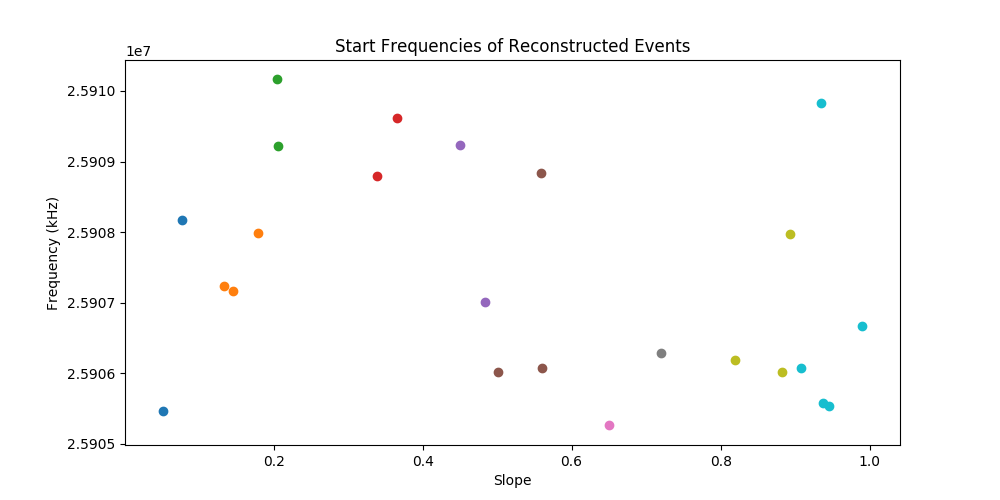

In [9]:
#frequency precision plots
plt.figure(figsize=(10,5))

plt.title('Start Frequencies of Reconstructed Events')
plt.xlabel('Slope')
plt.ylabel('Frequency (kHz)')
for each_s in freq_mask:
    #print([reconstructed_slope_arr[i] for i in each_s])
    #print([start_frequencies[i] for i in each_s])
    plt.scatter([reconstructed_slope_arr[i] for i in each_s], [rec_freq[i] for i in each_s])
#plt.savefig('./start_freq201904.png')

<IPython.core.display.Javascript object>


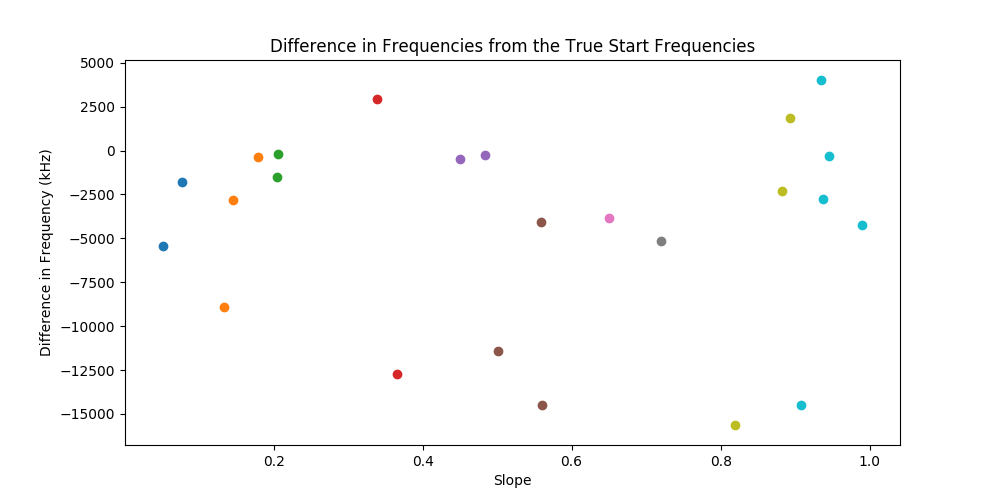

In [13]:
# difference in frequency
plt.figure(figsize=(10,5))

plt.title('Difference in Frequencies from the True Start Frequencies')
plt.xlabel('Slope')
plt.ylabel('Difference in Frequency (kHz)')
for each_s in freq_mask:
    plt.scatter([reconstructed_slope_arr[i] for i in each_s], [delta_frequency[i] for i in each_s])
#plt.savefig('./start_freq_difference201904')
    #plt.scatter([reconstructed_slope_arr[i] for i in each_s]-[true_freq[i] for i in each_s], [start_frequencies[i] for i in each_s])

<IPython.core.display.Javascript object>


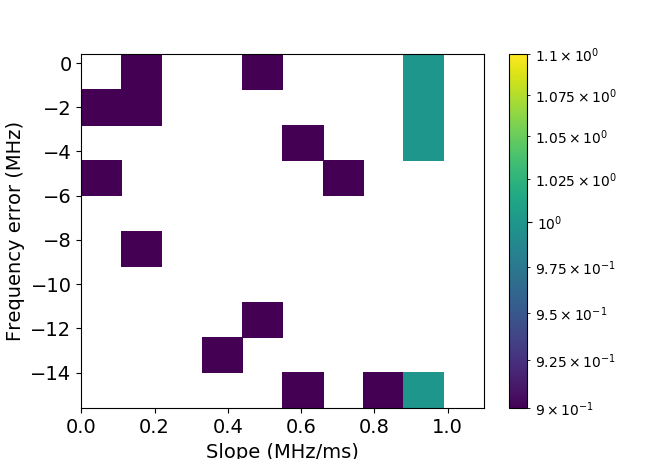

-15621.916388779879
3996.0076285861433


In [10]:
#frequency difference heatmap
max_freq = None
min_freq = None
fig, ax = plt.subplots(figsize=(6.5, 4.6))
plt.xlabel('Slope (MHz/ms)', fontsize=14)
plt.ylabel('Frequency error (MHz)', fontsize=14)
plt.tick_params(axis='both', labelsize=14)
for each_s in freq_mask:
    for i in each_s:
        if max_freq is None:
            max_freq = np.max(delta_frequency)
        else:
            if max_freq < np.max(delta_frequency):
                max_freq = np.max(delta_frequency)
        if min_freq is None:
            min_freq = np.min(delta_frequency)
        else:
            if min_freq > np.min(delta_frequency):
                min_freq = np.min(delta_frequency)
    #print(min_freq)
    hist = ax.hist2d([reconstructed_slope_arr[i] for i in each_s], [delta_frequency[i]/1000 for i in each_s], bins=10, norm=colors.LogNorm(), range=[[0, 1.1],[min_freq/1000, 0.4]])
plt.colorbar(hist[3])
#plt.grid()
plt.show()
#CHANGE THIS!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#plt.savefig('../../spring_quarter/SlopeScan_20190502/start_freq_difference_heatmap_zoom.png')
print(min_freq)
print(max_freq)

<IPython.core.display.Javascript object>


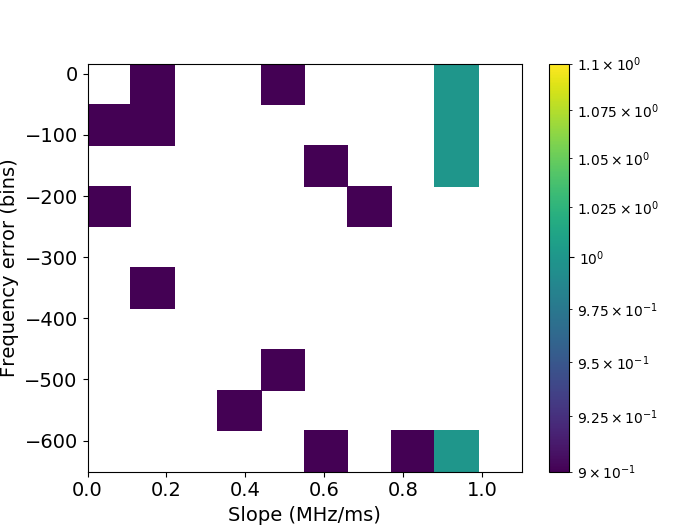

-650.9131828658283
166.50031785775596


In [15]:
#frequency difference heatmap
freq_bins = delta_frequency/24
max_freq = None
min_freq = None
fig, ax = plt.subplots(figsize=(7, 5.3))
plt.xlabel('Slope (MHz/ms)', fontsize=14)
plt.ylabel('Frequency error (bins)', fontsize=14)
plt.tick_params(axis='both', labelsize=14)
for each_s in freq_mask:
    for i in each_s:
        if max_freq is None:
            max_freq = np.max(freq_bins)
        else:
            if max_freq < np.max(freq_bins):
                max_freq = np.max(freq_bins)
        if min_freq is None:
            min_freq = np.min(freq_bins)
        else:
            if min_freq > np.min(freq_bins):
                min_freq = np.min(freq_bins)
    #print(min_freq)
    hist = ax.hist2d([reconstructed_slope_arr[i] for i in each_s], [(freq_bins[i]) for i in each_s], bins=10, norm=colors.LogNorm(), range=[[0, 1.1],[min_freq, 400/24]])
plt.colorbar(hist[3])
#plt.grid()
plt.show()
#CHANGE THIS!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#plt.savefig('../../spring_quarter/SlopeScan_20190502/start_freq_difference_heatmap_bins_zoom.png')
print(min_freq)
print(max_freq)

<IPython.core.display.Javascript object>


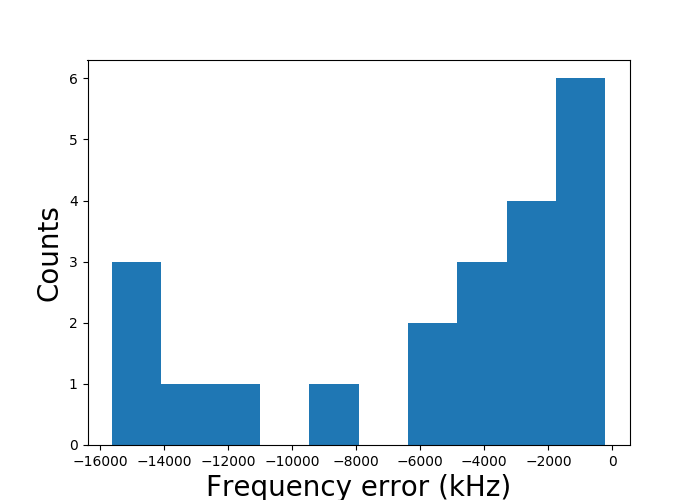

In [16]:
freq_mask2 = np.where(delta_frequency <= 480)
plt.figure(figsize=(7, 5))
plt.xlabel('Frequency error (kHz)', fontsize=20)
plt.ylabel('Counts', fontsize=20)
#plt.hist(delta_frequency)
plt.hist(delta_frequency[freq_mask2])
plt.show()
#plt.savefig('./SlopeScan_20190502/freq_error_hist_zoom.png')

<IPython.core.display.Javascript object>


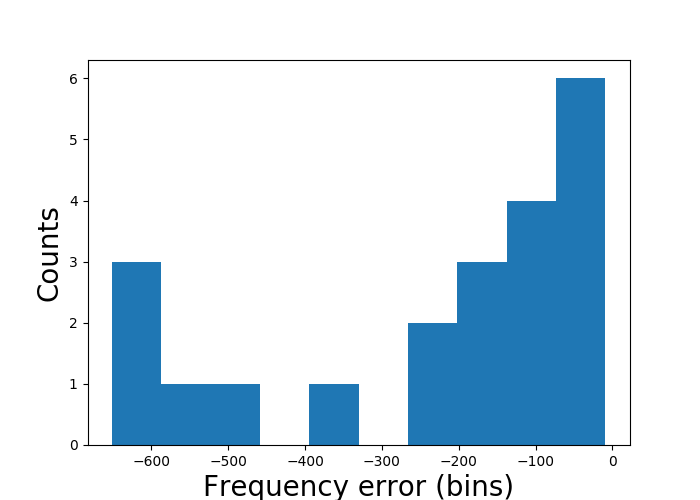

In [17]:
bin_mask = np.where(freq_bins <= 20)
plt.figure(figsize=(7, 5))
plt.xlabel('Frequency error (bins)', fontsize=20)
plt.ylabel('Counts', fontsize=20)
#plt.hist(freq_bins)
plt.hist(freq_bins[bin_mask])
plt.show()
#plt.savefig('./SlopeScan_20190502/freq_error_hist_bins_zoom.png')

In [22]:
print(len(frequency_means))
print(len(slope_int))

10
11


<IPython.core.display.Javascript object>


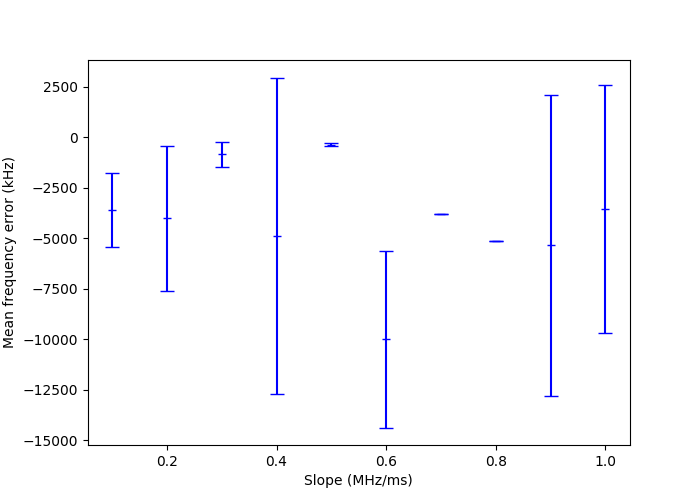

[-3620.1488666590303, -4023.39154417937, -856.8836650364101, -4890.471709977835, -363.7035918831825, -10004.08232379953, -3828.2913754731417, -5129.466810069978, -5353.995323566099, -3558.454966071993]
[1839.035188158974, 3603.5169008813473, 635.5230823531747, 7844.963301930577, 93.8670850135386, 4374.095857197809, 0.0, 0.0, 7458.946056892564, 6137.984829114895]


In [26]:
plt.figure(figsize=(7,5))
plt.xlabel('Slope (MHz/ms)')
plt.ylabel('Mean frequency error (kHz)')
#plt.xlim((0.0, 1.2))
#plt.yscale('log')
frequency_means = []
frequency_stds = []
for each_s in freq_mask:
    frequency_means.append(np.mean(delta_frequency[each_s]))
    frequency_stds.append(np.std(delta_frequency[each_s]))
print(frequency_means)
print(frequency_stds)
#plt.bar([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1], frequency_means, width=0.1, color='none', edgecolor='b', yerr=frequency_stds, capsize=5, ecolor='b')
plt.errorbar([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], frequency_means, yerr=frequency_stds, capsize=5, fmt='_', color='b')
plt.show()
#plt.savefig('../../spring_quarter/SlopeScan_20190502/mean_freq_error_log.png')

<IPython.core.display.Javascript object>


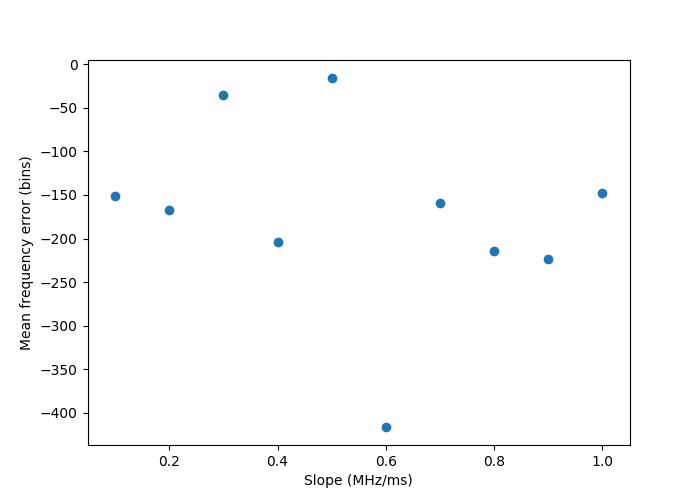

[-150.83953611079292, -167.64131434080707, -35.70348604318376, -203.76965458240983, -15.154316328465939, -416.83676349164716, -159.51214064471424, -213.72778375291577, -223.08313848192077, -148.26895691966638]
[76.62646617329058, 150.1465375367228, 26.48012843138228, 326.87347091377404, 3.9111285422307747, 182.25399404990873, 0.0, 0.0, 310.78941903719016, 255.74936787978723]


In [35]:
# plt.figure(figsize=(7,5))
# plt.xlabel('Slope (MHz/ms)')
# plt.ylabel('Mean frequency error (kHz)')
# #plt.xlim((0.0, 1.2))
# #plt.yscale('log')
# frequency_means = []
# frequency_stds = []
# for each_s in freq_mask:
#     frequency_means.append(np.mean(delta_frequency[each_s]))
#     frequency_stds.append(np.std(delta_frequency[each_s]))
# print(frequency_means)
# print(frequency_stds)
# #plt.bar([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1], frequency_means, width=0.1, color='none', edgecolor='b', yerr=frequency_stds, capsize=5, ecolor='b')
# plt.errorbar([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], frequency_means, yerr=frequency_stds, capsize=5, fmt='_', color='b')
# plt.show()

plt.figure(figsize=(7,5))
plt.xlabel('Slope (MHz/ms)')
plt.ylabel('Mean frequency error (bins)')
#plt.xlim((0.0, 1.2))
#plt.yscale('log')
frequency_means = []
frequency_stds = []
for each_s in freq_mask:
    frequency_means.append(np.mean(delta_frequency[each_s]/24))
    frequency_stds.append(np.std(delta_frequency[each_s]/24))
print(frequency_means)
print(frequency_stds)
plt.scatter([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], frequency_means)#, width=0.1, color='none', edgecolor='b')#, yerr=frequency_stds, capsize=5, ecolor='b')
plt.show()
#plt.savefig('../../spring_quarter/SlopeScan_20190502/mean_freq_errorbins_log.png')